# Generating mesh using delanuary triangulation
src: https://en.wikipedia.org/wiki/Delaunay_triangulation

In [147]:
import functools
import numpy as np

In [148]:
class Point:
    def __init__(self, x, y, name=''):
        self.x=x
        self.y=y
        self.name=name
    
    @property
    def quad(self):
        return ((self.x>=0)^(self.y>=0))|((self.y<0)<<1);
    
    @classmethod
    def polar_cmp(cls, a, b):
        if a.quad == b.quad:
            return -1 if (a.x*b.y-a.y*b.x)>0 else 1
        return -1 if a.quad < b.quad else 1
    
    @classmethod
    def polar_sort(cls, points):
        return sorted(points, key=functools.cmp_to_key(cls.polar_cmp))
    
    def __repr__(self):
        return f'Point {self.name}: ({self.x}, {self.y})'

In [149]:
def is_delanuary(triangle, point):
    assert len(triangle)==3
    verticies = Point.polar_sort(triangle)+[point]
    matrix = np.array([[v.x, v.y, v.x**2+v.y**2, 1] for v in verticies])
    det = np.linalg.det(matrix)
    return det <= 0

In [150]:
def flip(t1, t2):
    assert len(t1)==len(t2)==3
    points = list(set(t1)|set(t2))
    assert len(points)==4
    ps = Point.polar_sort(points)
    if is_delanuary(ps[:-1], ps[-1]):
        return ps[:-1], ps[1:]
    return ps[:2]+[ps[-1]], [ps[0]]+ps[2:]

In [151]:
def is_right(l1, l2, p):
    return ((l2.x-l1.x)*(p.y-l1.y)-(l2.y-l1.y)*(p.x-l1.x)) > 0;

In [152]:
def inside_triangle(triangle, point):
    assert len(triangle)==3
    d1=is_right(triangle[0], triangle[1], point)
    d2=is_right(triangle[1], triangle[2], point)
    d3=is_right(triangle[2], triangle[0], point)
    return d1==d2==d3

In [153]:
def find_triangle(triangles, point):
    for t in triangles:
        if inside_triangle(t, point):
            return t

In [154]:
x=Point(1,1,'x')
y=Point(0,1,'y')
z=Point(2,0,'z')
q=Point(3,4,'q')
r=Point(0,2,'r')
s=Point(-4,-2,'s')
points=[x,y,z,q,r,s]

In [155]:
flip([x,y,z],[x,y,q])

([Point z: (2, 0), Point x: (1, 1), Point y: (0, 1)],
 [Point z: (2, 0), Point q: (3, 4), Point y: (0, 1)])

In [156]:
# CREATING POLYGON AROUND THE POINTS
assert len(points)>=3
polygon = []
ps = Point.polar_sort(points)
count = len(ps)
max_x = max(ps, key=lambda p: p.x)
start_i = ps.index(max_x)
polygon += [ps[start_i], ps[(start_i+1)%count]]
i = (start_i+2)%count
while i != start_i:
    polygon += [ps[i]]
    if is_right(polygon[-3], polygon[-1], polygon[-2]):
        polygon.pop(-2)
    i=(i+1)%count
if is_right(polygon[-2], polygon[0], polygon[-1]):
    polygon.pop(-1)
print(polygon)

[Point q: (3, 4), Point r: (0, 2), Point s: (-4, -2), Point z: (2, 0)]


In [157]:
# TRIANGULATE POLYGON
triangles = []
for i in range(1, len(polygon)-1):
    triangles += [[polygon[0],polygon[i],polygon[i+1]]]
    
print(triangles)

[[Point q: (3, 4), Point r: (0, 2), Point s: (-4, -2)], [Point q: (3, 4), Point s: (-4, -2), Point z: (2, 0)]]


In [158]:
find_triangle(triangles, x)

[Point q: (3, 4), Point s: (-4, -2), Point z: (2, 0)]

In [159]:
inside_points = list(set(ps)-set(polygon))
for p in inside_points:
    print(p)
    t = find_triangle(triangles, p)
    triangles.remove(t)
    triangles += [[t[0],t[1],p], [t[1],t[2],p], [t[2],t[0],p]]

print(triangles)

Point x: (1, 1)
Point y: (0, 1)
[[Point q: (3, 4), Point r: (0, 2), Point s: (-4, -2)], [Point s: (-4, -2), Point z: (2, 0), Point x: (1, 1)], [Point z: (2, 0), Point q: (3, 4), Point x: (1, 1)], [Point q: (3, 4), Point s: (-4, -2), Point y: (0, 1)], [Point s: (-4, -2), Point x: (1, 1), Point y: (0, 1)], [Point x: (1, 1), Point q: (3, 4), Point y: (0, 1)]]


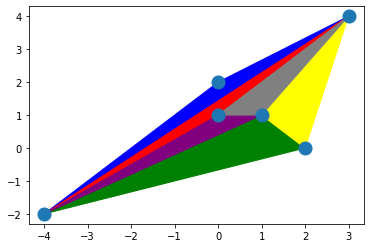

In [160]:
import numpy as np 
import matplotlib.pyplot as plt

X = np.array(list(map(lambda p: [p.x, p.y], points)))
plt.figure()

Xt = []
colors = ['blue', 'green', 'yellow', 'red', 'purple', 'grey']
for i, t in enumerate(triangles):
    cords = list(map(lambda p: [p.x, p.y], t))
    t1 = plt.Polygon(cords, color=colors[i])
    plt.gca().add_patch(t1)
plt.scatter(X[:, 0], X[:, 1], s = 170)
plt.show()

In [161]:
for t in triangles:
    for p in points:
        if p in t:
            continue
        if not is_delanuary(t,p):
            print(t,p)

[Point q: (3, 4), Point r: (0, 2), Point s: (-4, -2)] Point x: (1, 1)
[Point q: (3, 4), Point r: (0, 2), Point s: (-4, -2)] Point y: (0, 1)
[Point q: (3, 4), Point r: (0, 2), Point s: (-4, -2)] Point z: (2, 0)
[Point s: (-4, -2), Point z: (2, 0), Point x: (1, 1)] Point y: (0, 1)
[Point z: (2, 0), Point q: (3, 4), Point x: (1, 1)] Point y: (0, 1)
[Point z: (2, 0), Point q: (3, 4), Point x: (1, 1)] Point r: (0, 2)
[Point z: (2, 0), Point q: (3, 4), Point x: (1, 1)] Point s: (-4, -2)
[Point q: (3, 4), Point s: (-4, -2), Point y: (0, 1)] Point x: (1, 1)
[Point q: (3, 4), Point s: (-4, -2), Point y: (0, 1)] Point z: (2, 0)
[Point s: (-4, -2), Point x: (1, 1), Point y: (0, 1)] Point z: (2, 0)
[Point x: (1, 1), Point q: (3, 4), Point y: (0, 1)] Point r: (0, 2)
